<a href="https://colab.research.google.com/github/secretsather/Uno/blob/cleanup_main/Uno_Game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Played 20000 games.
[5054, 4911, 4975, 5060]


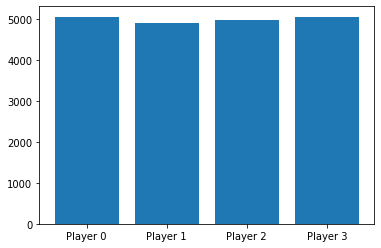

time: 21.9 s (started: 2021-03-28 15:38:08 +00:00)


In [64]:
### Implementation of Uno              ###
### By George Gardner                  ###
### Last updated March 28, 2021        ###

import random
from random import randrange
import numpy as np
import matplotlib.pyplot as plt

#!pip install ipython-autotime
#%load_ext autotime

class card:
  def __init__(self, color, name):
    self.name = name
    self.color = color
  def __str__(self):
      return '{} {}'.format(self.color, self.name)
  def show(self):
    print ("{} {}".format(self.color, self.name))

class deck:
  #Initialize an instance of a deck in draw_pile list
  #then an empty discard_pile list
  def __init__(self):
    self.draw_pile = []
    self.discard_pile = []
    for c in ["Blue", "Green", "Red", "Yellow"]:
      for n in ["Zero", "One", "Two", "Three", "Four", "Five", "Six", 
                "Seven", "Eight", "Nine", "Skip", "Reverse", "Draw Two"]:
        if n != "Zero":
          self.draw_pile.append(card(c,n))
        self.draw_pile.append(card(c,n))
    for i in range(8):
      if(i<4): self.draw_pile.append(card("","Wild"))
      else: self.draw_pile.append(card("Draw 4","Wild"))
    self.shuffle()

  #Shuffles the deck
  def shuffle(self):
    random.shuffle(self.draw_pile)

  #Returns a single card from the deck
  def draw(self):                                                    
    if(len(self.draw_pile) < 1):
      for i in range(len(self.discard_pile)):
        self.draw_pile.append(self.discard_pile.pop())
      self.discard_pile.append(self.draw_pile.pop(0))
      self.shuffle()
      return self.draw_pile.pop()
    else:
      return self.draw_pile.pop()
  
class player:
  #Initialize an instance of a player
  def __init__(self, player_number):
    self.hand = []
    self.number = player_number

  def __str__(self):
    return "Player No. {}".format(str(self.number))

  #Player chooses a color when a wild card is played, currently random  
  def choosecolor(self):
    coList = ["Blue", "Green", "Red", "Yellow"]
    return coList[randrange(4)]

  #Returns a list of ints that contain valid moves the player can take
  def validPlays(self, inPlay, forcedColor):
    vp = []
    for index, c in enumerate(self.hand):
      if inPlay.name == "Wild":
        if c.color == forcedColor:
          vp.append(index)
      elif (c.color == inPlay.color) or (c.name == inPlay.name):
        vp.append(index)
      if (c.name == "Wild"):
        vp.append(index)
    return vp

  #Returns a random play based on valid moves
  def play(self, valids):
    return randrange(len(valids))

class game:
  #initialize an instance of a game. Game is played in the initialization.
  def __init__(self, no_of_players, verbose):
    self.verbose = verbose
    #The below sets an initial color in the event a wild is thrown as first card
    self.forceColor = "Blue"
    self.winner = -1

    #validate number of players
    if(no_of_players > 10): raise NameError('Too many players')
    if(no_of_players < 2): raise NameError('Too few players')

    #Initialize the deck
    if self.verbose: print("The deck is being shuffled")
    self.Deck = deck()                                         
    if self.verbose: print("There are " + 
                           str(len(self.Deck.draw_pile)) + 
                           " cards in the draw pile.")
    
    #Initialize the players, held as a list of an instance of class player
    self.players = []                                          
    for p in range(no_of_players):
      self.players.append(player(p))

    if self.verbose: print("There are " + 
                           str(len(self.players)) + 
                           " players in this game.")
    #randomize the start player
    currentPlayer = randrange(len(self.players))             

    #deal starting hand to each player (7 cards)
    for i in range(7):                                        
      for p in range(no_of_players):
        self.players[p].hand.append(self.Deck.draw())
    if self.verbose: print("The players have been dealt " + 
                           str(len(self.players[0].hand)) + 
                           " cards each.")

    #Remove the next card off the draw pile, face up on the discard pile
    self.Deck.discard_pile.append(self.Deck.draw_pile.pop())
    if self.verbose: print(str(self.Deck.discard_pile[0]) + 
                           " has been removed from the draw pile and placed " +
                           "on the discard pile.")
    if self.verbose: print("There are " + 
                           str(len(self.Deck.draw_pile)) + 
                           " cards remaining in the draw pile.")
    
    #Track the direction of gamplay (for instances of reverse card)
    direction = True                
    
    #Track the number of plays in game - currently not used
    self.iteration = 0          

    #Iterative gameplay begins here
    if self.verbose: print("The game begins.")

    #Gamplay loops until winner != -1
    while self.winner == -1:      
      #current player takes turn
      turn = 0
      while turn == 0:
        #Get valid actions player may take
        vp = self.players[currentPlayer].validPlays(
             self.Deck.discard_pile[-1], self.forceColor)
        
        #Draw a card if there are no valid actions
        if len(vp) == 0:
          self.players[currentPlayer].hand.append(self.Deck.draw())
          if self.verbose: print("player " + 
                                 str(currentPlayer) + 
                                 " draws a " + 
                                 str(self.players[currentPlayer].hand[-1]))
        #otherwise take a valid action
        else:
          cardToPlay = self.players[currentPlayer].play(vp)
          self.Deck.discard_pile.append(self.players[
                                        currentPlayer].hand.pop(vp[cardToPlay]))
          turn = 1
      if self.verbose: print("Player " 
                             + str(currentPlayer) + 
                             " has played a " + str(self.Deck.discard_pile[-1]))

      #Check for win condition
      if len(self.players[currentPlayer].hand) == 0:                   
        if self.verbose: print("Player " + str(currentPlayer) + " wins!")
        self.winner = currentPlayer
      
      #If no win condition, look for special case cards
      else:
        #If a wild card was played, select a continuing color
        if self.Deck.discard_pile[-1].name == "Wild":
          self.forceColor = self.players[currentPlayer].choosecolor() 
        if self.verbose: print("Player " + 
                               str(currentPlayer) + 
                               " chosen the color " + 
                               self.forceColor)

        #If a "draw 4" was played, have next player draw 4 cards
        if self.Deck.discard_pile[-1].color == "Draw 4":
          playerToDraw = self.nextPlayer(currentPlayer, direction)
          for i in range(4):
            self.players[playerToDraw].hand.append(self.Deck.draw())
          #advance currentPlayer, making drawing player lose turn
          currentPlayer = self.nextPlayer(currentPlayer, direction) 
          if self.verbose: print("Player " + 
                                 str(playerToDraw) + 
                                 " has drawn 4 cards and lost its turn.")

        #If a "draw 2" was played, have next player draw 2 cards
        if self.Deck.discard_pile[-1].name == "Draw Two":
          playerToDraw = self.nextPlayer(currentPlayer, direction)
          self.players[playerToDraw].hand.append(self.Deck.draw())
          self.players[playerToDraw].hand.append(self.Deck.draw())
          #player drawing does not lose turn here according to rules
          if self.verbose: print("Player " + 
                                 str(playerToDraw) + 
                                 " has drawn 2 cards.")

        #If a "skip" was played, advance player position by 2
        if self.Deck.discard_pile[-1].name == "Skip":
          currentPlayer = self.nextPlayer(currentPlayer, direction)
          currentPlayer = self.nextPlayer(currentPlayer, direction)
        #otherwise, check for reverse and then advance player
        else:
          #Check for played reverse
          if self.Deck.discard_pile[-1].name == "Reverse":
            if direction: 
              direction = False 
            else:
              direction = True
          #Advance to next player        
          currentPlayer = self.nextPlayer(currentPlayer, direction)      
        
        #Advance turn count - currently not used
        self.iteration += 1 
      ### END WHILE self.winner == -1    

    ##### Sanity Check for Debugging #####
    #if self.verbose: 
      #print("****************************************************************")
      #print("The discard pile consists of:")
      #for count, c in enumerate(self.Deck.discard_pile): 
        #print(str(count) + ": " + str(c))

      #for p in range(len(self.players)): 
        #print(str(self.players[p]) + " has the following hand:")
        #for h in range(len(self.players[p].hand)):
          #print(self.players[p].hand[h])  

      #print("There are " + 
              #str(len(self.Deck.draw_pile)) + 
              #" cards remaining in the draw pile.") 
      #print("There are " + 
            #str(len(self.Deck.discard_pile)) + 
            #" cards remaining in the discard pile.") 
      #for count, p in enumerate(self.players):
         #print("Player " + str(count) + 
               #" has " + str(len(self.players[count].hand)) + 
               #" cards in hand")
    ##### END Sanity Check for Debugging #####

  #returns the index of the next player based on current player & direction
  def nextPlayer(self, cp, dir):
    if dir: 
        cp +=1 
        if cp > (len(self.players) - 1): cp = 0
    else:
      if cp == 0:
        cp = (len(self.players) - 1)
      else:
        cp -= 1
    return cp

#Game settings for iteration
UnoPlayers = 4
verbose = False
gameIterations = 20000

#Setup list to track player wins (dynamic)
playerWins = [0 for x in range(UnoPlayers)]

#Begin game(s)
for g in range(gameIterations):
  UNO = game(UnoPlayers, verbose) 
  playerWins[UNO.winner] += 1

#Print Statistics
print("Played " + str(gameIterations) + " games.")
print(playerWins)

#Display graph
bars = []
for index, p in enumerate(playerWins):
  bars.append("Player " + str(index))
x_pos = np.arange(len(bars))
plt.bar(x_pos, playerWins)
plt.xticks(x_pos, bars)
plt.show()